## [Problem 1] Confirmation of competition contents

 ***What to learn and what to predict?*** 

We are to learn the *TRANSACTION INFORMATION* of the clients and to Predict the *PAYMENT ABILITIES* of the clients(the probability for the TARGET variable)

****What kind of file to create and submit to Kaggle?****

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

**SK_ID_CURR,TARGET**
- 100001,0.1
- 100005,0.9
- 100013,0.2

 **What kind of index value will be used to evaluate the submissions?**

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## [Problem 2] Learning and verification

- We import all needed libraries
- Load the Data (application_train.csv)
- Delete the Null data(empty data)
- extract or separate them into variables

In [84]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [85]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
print('Training data shape:',train.shape)
print('Testing data shape',test.shape)

Training data shape: (307511, 122)
Testing data shape (48744, 121)


In [86]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Checking missing data and dropping column with over 10% of missing data**

In [87]:
total = train.isnull().sum().sort_values(ascending=False)
persent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
data = pd.concat([total,persent], axis=1, keys=['Total','Persent'])
data

,Total,Persent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [88]:
features = data[data.Persent < 0.1]
features

,Total,Persent
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [89]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'TARGET', 'FLAG_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FL

In [90]:
train = train[features.index]
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,Business Entity Type 3,0,0,0,0,0,10,100002
1,Family,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,School,0,0,0,0,0,11,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,Government,0,0,0,0,0,9,100004
3,Unaccompanied,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,Business Entity Type 3,0,0,0,0,0,17,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,Religion,1,1,0,0,0,11,100007


In [91]:
total_test = test.isnull().sum().sort_values(ascending=False)
persent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
data_test = pd.concat([total_test, persent], axis=1, keys=['Total','Persent'])
data_test

,Total,Persent
COMMONAREA_MEDI,33495,0.687161
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
NONLIVINGAPARTMENTS_MODE,33347,0.684125
NONLIVINGAPARTMENTS_MEDI,33347,0.684125
...,...,...
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000


In [92]:
test_features = data_test[data_test.Persent < 0.1]
test_features.shape

(64, 2)

In [93]:
test = test[test_features.index]
test.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR
0,Unaccompanied,0.0,0.0,0.0,0.0,20560.5,0.789654,1,0,1,...,0,0,0,Kindergarten,0,0,0,0,0,100001
1,Unaccompanied,0.0,0.0,0.0,0.0,17370.0,0.291656,1,0,1,...,0,0,0,Self-employed,0,0,0,0,0,100005
2,NaN,0.0,0.0,0.0,0.0,69777.0,0.699787,1,0,1,...,0,0,0,Transport: type 3,0,0,0,0,0,100013
3,Unaccompanied,0.0,0.0,0.0,0.0,49018.5,0.509677,1,0,1,...,0,0,0,Business Entity Type 3,0,0,0,0,0,100028
4,Unaccompanied,0.0,0.0,0.0,0.0,32067.0,0.425687,1,1,1,...,0,0,0,Business Entity Type 3,1,1,0,0,0,100038


In [94]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0: loan paid ontime, 1: loan unpaid


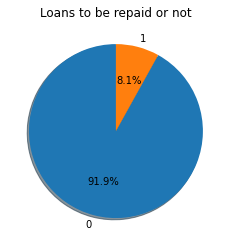

In [95]:
print("0: loan paid ontime, 1: loan unpaid")
plt.pie(train["TARGET"].value_counts(), labels=['0','1'], autopct="%1.1f%%",shadow=True, startangle=90)
plt.title("Loans to be repaid or not")
plt.show()

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              306219 non-null  object 
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  AMT_CREDIT                   307511 non-null  float64
 11  FLAG_OWN_CAR                 307511 non-null  object 
 12  FLAG_EMAIL                   307511 non-null  int64  
 13 

In [97]:
objects = train.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Unaccompanied,N,Cash loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,WEDNESDAY,Business Entity Type 3
1,Family,N,Cash loans,F,N,Married,Higher education,State servant,House / apartment,MONDAY,School
2,Unaccompanied,Y,Revolving loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,MONDAY,Government
3,Unaccompanied,N,Cash loans,F,Y,Civil marriage,Secondary / secondary special,Working,House / apartment,WEDNESDAY,Business Entity Type 3
4,Unaccompanied,N,Cash loans,M,Y,Single / not married,Secondary / secondary special,Working,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,N,Cash loans,M,N,Separated,Secondary / secondary special,Working,With parents,THURSDAY,Services
307507,Unaccompanied,N,Cash loans,F,Y,Widow,Secondary / secondary special,Pensioner,House / apartment,MONDAY,XNA
307508,Unaccompanied,N,Cash loans,F,Y,Separated,Higher education,Working,House / apartment,THURSDAY,School
307509,Unaccompanied,N,Cash loans,F,Y,Married,Secondary / secondary special,Commercial associate,House / apartment,WEDNESDAY,Business Entity Type 1


In [98]:
objects.isna().sum()

NAME_TYPE_SUITE               1292
FLAG_OWN_CAR                     0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_REALTY                  0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [99]:
train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [100]:
train['NAME_TYPE_SUITE'].isna().sum()

1292

In [101]:
test['NAME_TYPE_SUITE'].isna().sum()

911

In [102]:
train['NAME_TYPE_SUITE'] = train['NAME_TYPE_SUITE'].fillna('Unaccompanied')
test['NAME_TYPE_SUITE'] = test['NAME_TYPE_SUITE'].fillna('Unaccompanied')
objects = train.select_dtypes(include=[object])
objects.isna().sum()

NAME_TYPE_SUITE               0
FLAG_OWN_CAR                  0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_REALTY               0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objects = train.dtypes[train.dtypes == "object"].index
objects

Index(['NAME_TYPE_SUITE', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [104]:
for i in objects:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              307511 non-null  int64  
 1   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  AMT_CREDIT                   307511 non-null  float64
 11  FLAG_OWN_CAR                 307511 non-null  int64  
 12  FLAG_EMAIL                   307511 non-null  int64  
 13 

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_TYPE_SUITE              48744 non-null  int64  
 1   OBS_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE     48715 non-null  float64
 5   AMT_ANNUITY                  48720 non-null  float64
 6   EXT_SOURCE_2                 48736 non-null  float64
 7   FLAG_MOBIL                   48744 non-null  int64  
 8   FLAG_WORK_PHONE              48744 non-null  int64  
 9   FLAG_EMP_PHONE               48744 non-null  int64  
 10  DAYS_REGISTRATION            48744 non-null  float64
 11  FLAG_CONT_MOBILE             48744 non-null  int64  
 12  FLAG_PHONE                   48744 non-null  int64  
 13  FLAG_EMAIL      

### Data cleaning

In [107]:
#data cleaning for the empty
train.isnull().any(axis=0).sum()

9

In [108]:
train.isnull().any(axis=1).sum()

1966

In [109]:
variables = train.columns
columns = variables.drop('TARGET')
columns

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'FLAG_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
       'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [110]:
for c in columns:
    train[c] = train[c].fillna((train[c].mean()))
    test[c] = train[c].fillna((test[c].mean()))

In [111]:
train.isnull().any(axis=0).sum()

0

In [112]:
train.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,5,0,0,0,0,0,10,100002
1,1,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,39,0,0,0,0,0,11,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,11,0,0,0,0,0,9,100004
3,6,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,5,0,0,0,0,0,17,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,37,1,1,0,0,0,11,100007


### Learning

In [135]:
x = train.drop(['TARGET'], axis=1)
y = train[['TARGET']]

In [136]:
x.shape, y.shape

((307511, 64), (307511, 1))

In [115]:
x.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,6,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,5,0,0,0,0,0,10,100002
1,1,1.0,1.0,0.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,39,0,0,0,0,0,11,100003
2,6,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,0,11,0,0,0,0,0,9,100004
3,6,2.0,2.0,0.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,5,0,0,0,0,0,17,100006
4,6,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,37,1,1,0,0,0,11,100007


### Spleating and Standardizing data

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Learning and estimation

In [117]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preds_dt = dt.predict(X_test)

In [118]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_preds_log = log.predict(X_test)

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds_rf = rf.predict(X_test)

**Evaluation**

In [120]:
roc_auc_score(y_test, y_preds_dt)

0.5260256895666703

In [121]:
roc_auc_score(y_test, y_preds_log)

0.5002828037031128

In [122]:
roc_auc_score(y_test, y_preds_rf)

0.5001449432791767

## [Problem 3] Estimation on test data

Perform the estimation on the test data (application_test.csv ) and submit it to Kaggle.

In [123]:
print("Training data shape:", train.shape)
print("Training data shape:", test.shape)

Training data shape: (307511, 65)
Training data shape: (48744, 64)


In [124]:
#Predicting with Decision Tree
y_preds_dt2 = dt.predict(test)
test['TARGET'] = y_preds_dt2
test.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,EXT_SOURCE_2,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET
0,6,2.0,2.0,2.0,2.0,24700.5,0.262949,1,0,1,...,0,0,5,0,0,0,0,0,100002,0
1,1,1.0,1.0,0.0,0.0,35698.5,0.622246,1,0,1,...,0,0,39,0,0,0,0,0,100003,0
2,6,0.0,0.0,0.0,0.0,6750.0,0.555912,1,1,1,...,0,0,11,0,0,0,0,0,100004,0
3,6,2.0,2.0,0.0,0.0,29686.5,0.650442,1,0,1,...,0,0,5,0,0,0,0,0,100006,0
4,6,0.0,0.0,0.0,0.0,21865.5,0.322738,1,0,1,...,0,0,37,1,1,0,0,0,100007,0


In [134]:
submission_12 = test.loc[:,('SK_ID_CURR','TARGET')]
submission_12

,SK_ID_CURR,TARGET
0,100002,0
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
48739,156444,0
48740,156445,0
48741,156446,0
48742,156447,0


In [158]:
submission = pd.read_csv('./sample_submission.csv')
submission["TARGET"] = y_preds_dt2
submission["SK_ID_CURR"] = test.loc[:,"SK_ID_CURR"]
submission.to_csv('./submission2.csv', index=False)

## [Problem 4] Feature engineering

In [59]:
imp_features = pd.DataFrame({'Feature': dt.feature_importances_}, index=x.columns).sort_values(by='Feature', ascending=False)
imp_features.head(10)

,Feature
EXT_SOURCE_2,0.097204
DAYS_REGISTRATION,0.071643
DAYS_BIRTH,0.071440
SK_ID_CURR,0.068478
DAYS_ID_PUBLISH,0.065667
DAYS_EMPLOYED,0.058436
AMT_ANNUITY,0.058412
DAYS_LAST_PHONE_CHANGE,0.057158
REGION_POPULATION_RELATIVE,0.044008
AMT_CREDIT,0.042823


In [60]:
important = imp_features.head(10).index
important

Index(['EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_BIRTH', 'SK_ID_CURR',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT'],
      dtype='object')

In [61]:
#Defining a function to determining the index value for each feature used
def feature(X, feature):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_preds = dt.predict(X_test)
    
    roc_auc_score(y_test, y_preds)
    print(f'ROC score for {feature} is:{roc_auc_score(y_test, y_preds)}')

In [62]:
X1 = train[important]
X2 = train[important[0:1]]
X3 = train[important[0:4]]
X4 = train[important[0:6]]
X5 = train[important[0:8]]
X6 = train[important[2:3]]
X7 = train[important[3:4]]
X8 = train[important[4:5]]
X9 = train[important[5:6]]

In [63]:
feature(X1, 'the top 10 features')

ROC score for the top 10 features is:0.5447831559772042


In [64]:
feature(X2, 'EXT_SOURCE_2')

ROC score for EXT_SOURCE_2 is:0.5023863627879338


In [65]:
feature(X3, 'the top 3 features')

ROC score for the top 3 features is:0.5000719382829878


In [66]:
feature(X4, 'the top 5 features')

ROC score for the top 5 features is:0.49508027071412053


In [67]:
feature(X5, 'the top 7 features')

ROC score for the top 7 features is:0.4999056962108539


In [68]:
feature(X6, 'DAYS_REGISTRATION')

ROC score for DAYS_REGISTRATION is:0.5


In [69]:
feature(X7, 'DAYS_ID_PUBLISH')

ROC score for DAYS_ID_PUBLISH is:0.5


In [70]:
feature(X8, 'DAYS_BIRTH')

ROC score for DAYS_BIRTH is:0.5


In [71]:
feature(X9, 'DAYS_EMPLOYED')

ROC score for DAYS_EMPLOYED is:0.5


In [72]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [73]:
dt = tree.DecisionTreeClassifier()
dt.fit(X1_train, y_train)

DecisionTreeClassifier()

In [74]:
test1 = test[important]

In [75]:
y_preds = dt.predict(test1)

In [76]:
test['TARGET'] = y_preds

In [77]:
submission_1 = test.loc[:,('SK_ID_CURR','TARGET')]

In [78]:
submission_1.to_csv("submission_1.csv", index=False)